In [ ]:
# tensorflow 2.7 버전 삭제 (버전 낮추기 위해 현재 버전 삭제)
!pip uninstall tensorflow

Mounted at /content/drive


In [ ]:
# tensorflow 1.5 버전 새로 설치 후 런타임 재실행
!pip install tensorflow==1.15

In [ ]:
#pyplot 한글 깨질 경우 실행, 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import tensorflow as tf
print(tf.__version__) # 1.15.0

1.15.0


In [ ]:
import matplotlib.font_manager as fm 
import matplotlib as mpl
import matplotlib.pyplot as plt
# 런타임 재실 행 후 빌드
fm._rebuild()

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumMyeongjo


In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
# google drive 에 저장 된 전처리 데이터 불러오기, 총 11680 건, 관광지기준정보 읍면동에 맞추어 필터링한 데이터
df1 = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/modelFeature_02.csv") # 요일 = 월:0 일:6
df1 = df1.iloc[:,1:]
df1

,날짜,읍면동,관광기후지수,평균기온,일강수량,최대풍속,월,요일,총방문자수,연도
0,2018-01-01,건입동,33.81,0.8,0.0,2.6,1,0,176759,2018
1,2018-01-02,건입동,57.30,1.0,0.0,1.5,1,1,154567,2018
2,2018-01-03,건입동,48.52,0.0,0.0,3.4,1,2,132826,2018
3,2018-01-04,건입동,29.42,-1.1,1.0,2.1,1,3,157389,2018
4,2018-01-05,건입동,21.54,-0.4,4.5,3.2,1,4,152996,2018
...,...,...,...,...,...,...,...,...,...,...
11675,2019-12-27,한림읍,-0.53,6.1,0.0,5.3,12,4,208737,2019
11676,2019-12-28,한림읍,-0.18,7.0,0.0,2.0,12,5,213487,2019
11677,2019-12-29,한림읍,-0.78,12.3,34.0,3.3,12,6,211347,2019
11678,2019-12-30,한림읍,-0.40,10.8,0.0,4.4,12,0,206446,2019


In [ ]:
df1['날짜'] = pd.to_datetime(df1['날짜'])
df1.dtypes

날짜        datetime64[ns]
읍면동               object
관광기후지수           float64
평균기온             float64
일강수량             float64
최대풍속             float64
월                  int64
요일                 int64
총방문자수              int64
연도                 int64
dtype: object

In [ ]:
t = (df1.groupby("읍면동").count()).reset_index(level=['읍면동'])['읍면동'] # 동 16건
dong = []
for i in t:
  dong.append(i)

len(dong)

16

건입동
구좌읍
남원읍
노형동
대정읍
서홍동
성산읍
안덕면
애월읍
연동
용담1동
우도면
조천읍
표선면
한경면
한림읍


Text(0, 0.5, '총방문자수')

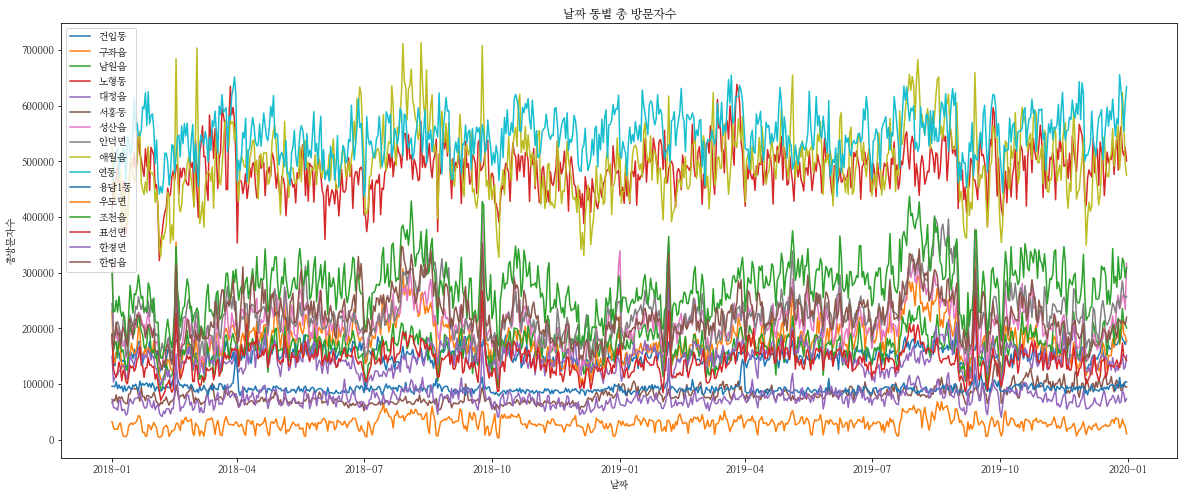

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(dong)):
  df = df1[df1['읍면동']==dong[i]]
  print(dong[i])
  plt.plot(df['날짜'], df['총방문자수'],label=dong[i])

plt.legend()
plt.title('날짜 동별 총 방문자수')
plt.xlabel('날짜')
plt.ylabel('총방문자수')
# 월별, 동별로 비슷

In [ ]:
## 예측 모델 만들기!!
#모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [ ]:
# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()
 
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min()+ 1e-7) # 1e-7은 0으로 나누는 오류 예방차원
 
# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min()+1e-7)) + org_x_np.min()

In [ ]:
#동별 혼잡도 구하기, 날짜별 방문인구 min-max scaling
for i in range(len(dong)):
  target_considered = ['날짜','읍면동','혼잡도']
  dong_nm = dong[i]
  if i == 0 :
    target = df1[df1['읍면동']==dong_nm]
    target['혼잡도'] = min_max_scaling(target['총방문자수'].astype(np.float))
    target = target[target_considered]
    target = pd.merge(df1, target, how="inner", on = ["날짜","읍면동"])
    df2 = target

  elif i > 0 :
    old_target = df2
    target = df1[df1['읍면동']==dong[i]]
    target['혼잡도'] = min_max_scaling(target['총방문자수'].astype(np.float))
    target = target[target_considered]
    target = pd.merge(df1, target, how="inner", on = ["날짜","읍면동"])
    df2 = old_target.append(target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df2

,날짜,읍면동,관광기후지수,평균기온,일강수량,최대풍속,월,요일,총방문자수,연도,혼잡도
0,2018-01-01,건입동,33.81,0.8,0.0,2.6,1,0,176759,2018,0.815931
1,2018-01-02,건입동,57.30,1.0,0.0,1.5,1,1,154567,2018,0.551469
2,2018-01-03,건입동,48.52,0.0,0.0,3.4,1,2,132826,2018,0.292383
3,2018-01-04,건입동,29.42,-1.1,1.0,2.1,1,3,157389,2018,0.585099
4,2018-01-05,건입동,21.54,-0.4,4.5,3.2,1,4,152996,2018,0.532748
...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,한림읍,-0.53,6.1,0.0,5.3,12,4,208737,2019,0.366518
726,2019-12-28,한림읍,-0.18,7.0,0.0,2.0,12,5,213487,2019,0.387387
727,2019-12-29,한림읍,-0.78,12.3,34.0,3.3,12,6,211347,2019,0.377985
728,2019-12-30,한림읍,-0.40,10.8,0.0,4.4,12,0,206446,2019,0.356453


건입동
구좌읍
남원읍
노형동
대정읍
서홍동
성산읍
안덕면
애월읍
연동
용담1동
우도면
조천읍
표선면
한경면
한림읍


Text(0, 0.5, '혼잡도')

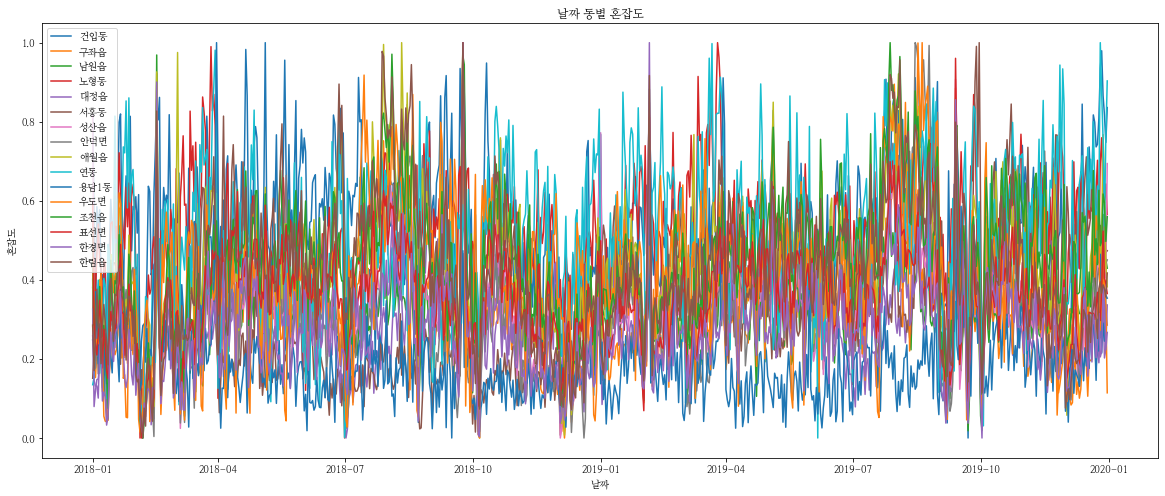

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(dong)):
  df = df2[df2['읍면동']==dong[i]]
  print(dong[i])
  plt.plot(df['날짜'], df['혼잡도'],label=dong[i])

plt.legend()
plt.title('날짜 동별 혼잡도')
plt.xlabel('날짜')
plt.ylabel('혼잡도')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


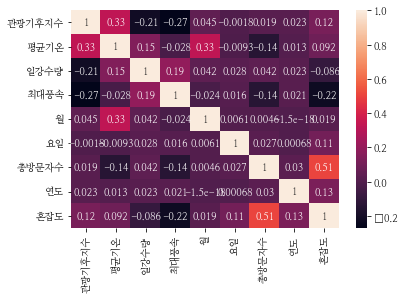

In [ ]:
import seaborn as sns
sns.heatmap(df2.corr(), annot=True)

In [ ]:
# 하이퍼파라미터
#input_data_column_cnt = 6  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [ ]:
result_arr = []
result_full_arr1 = []
result_full_arr2 = []
test_error_summary_arr = []
train_error_summary_arr = []
testY_arr = []
test_predict_arr = []

#input_data_column_cnt = 4  # 입력데이터의 컬럼 개수(Variable 개수) '관광기후지수','평균기온','요일', 혼잡도'
#input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수) '관광기후지수','평균기온','일강수량','최대풍속', '혼잡도'
input_data_column_cnt = 4  # 입력데이터의 컬럼 개수(Variable 개수) '관광기후지수','평균기온','최대풍속','혼잡도'

for _dong in dong:  
  df3 = df2[df2['읍면동']==_dong]
  #features_cosidered=['관광기후지수','최대풍속','요일','혼잡도']
  #features_cosidered=['관광기후지수','평균기온','일강수량','최대풍속','혼잡도']
  features_cosidered=['관광기후지수','평균기온','최대풍속','혼잡도']
  features = df3[features_cosidered]
  features.index = df3['날짜']
  features = features.astype(np.float) # 부동소수점으로 변환
  norm_features = min_max_scaling(features[features_cosidered]) # min max 정규화
  x = norm_features
  y = x[:,[-1]] # 타겟은 총방문자수
  dataX = [] # 입력으로 사용될 Sequence Data
  dataY = [] # 출력(타켓)으로 사용
  for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 혼잡도(정답)
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

  #학습용/테스트용 데이터 생성
  # 전체 70%를 학습용 데이터로 사용
  train_size = int(len(dataY) * 0.7)
  # 나머지(30%)를 테스트용 데이터로 사용
  test_size = len(dataY) - train_size

  # 데이터를 잘라 학습용 데이터 생성
  trainX = np.array(dataX[0:train_size])
  trainY = np.array(dataY[0:train_size])

  # 데이터를 잘라 테스트용 데이터 생성
  testX = np.array(dataX[train_size:len(dataX)])
  testY = np.array(dataY[train_size:len(dataY)])
  # 텐서플로우 플레이스홀더 생성
  # 입력 X, 출력 Y를 생성한다
  tf.reset_default_graph()
  X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
  Y = tf.placeholder(tf.float32, [None, 1])
  # 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
  targets = tf.placeholder(tf.float32, [None, 1])
  predictions = tf.placeholder(tf.float32, [None, 1])

  # num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
  stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
  multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

  # RNN Cell(여기서는 LSTM셀임)i들을 연결
  hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
  hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

  # 손실함수로 평균제곱오차를 사용한다
  loss = tf.reduce_sum(tf.square(hypothesis - Y))
  # 최적화함수로 AdamOptimizer를 사용한다
  optimizer = tf.train.AdamOptimizer(learning_rate)
  # optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임 
  train = optimizer.minimize(loss)
  # RMSE(Root Mean Square Error)
  # 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
  # rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
  rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
  train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
  test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
  test_predict = ''        # 테스트용데이터로 예측한 결과
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  # 학습한다
  start_time = datetime.datetime.now() # 시작시간을 기록한다
  #print('학습을 시작합니다...')
  for epoch in range(epoch_num):
      _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
      if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
          # 학습용데이터로 rmse오차를 구한다
          train_predict = sess.run(hypothesis, feed_dict={X: trainX})
          train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
          train_error_summary.append(train_error)

          # 테스트용데이터로 rmse오차를 구한다
          test_predict = sess.run(hypothesis, feed_dict={X: testX})
          test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
          test_error_summary.append(test_error)
          
          # 현재 오류를 출력한다
          #print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
          
  end_time = datetime.datetime.now() # 종료시간을 기록한다
  elapsed_time = end_time - start_time # 경과시간을 구한다
  
  test_error_summary_arr.append([_dong, test_error_summary]) # 테스트 에러값
  train_error_summary_arr.append([_dong, train_error_summary]) # 트레이닝 에러값
  testY_arr.append([_dong, testY]) # 테스트 실제값
  test_predict_arr.append([_dong, test_predict]) # 테스트 모델결과값
  
  # sequence length만큼의 가장 최근 데이터를 슬라이싱한다
  recent_data = np.array([x[len(x)-seq_length : ]]) 
  # 내일 예측
  test_predict = sess.run(hypothesis, feed_dict={X: recent_data})

  test_predict = reverse_min_max_scaling(features,test_predict) # 데이터 역정규화한다
  result_arr.append([_dong, test_predict[0][0]])
  result_full_arr1.append([_dong, test_predict])
  result_full_arr2.append([_dong, test_predict[0]])

result_arr
# 5분 이상 소요

[['건입동', 0.25432682],
 ['구좌읍', 0.57315207],
 ['남원읍', -0.7996545],
 ['노형동', -0.036319733],
 ['대정읍', 0.46835303],
 ['서홍동', -0.37837625],
 ['성산읍', 0.24265146],
 ['안덕면', 0.6518481],
 ['애월읍', 0.5200391],
 ['연동', 0.13498783],
 ['용담1동', 0.12239456],
 ['우도면', -0.098128796],
 ['조천읍', 0.5804329],
 ['표선면', -0.721817],
 ['한경면', -0.12941754],
 ['한림읍', 0.5113857]]

Text(0, 0.5, '혼잡도')

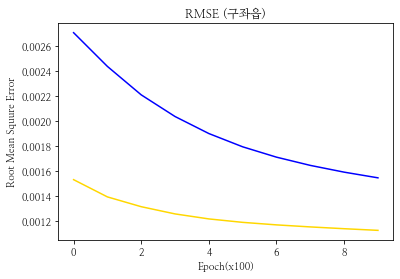

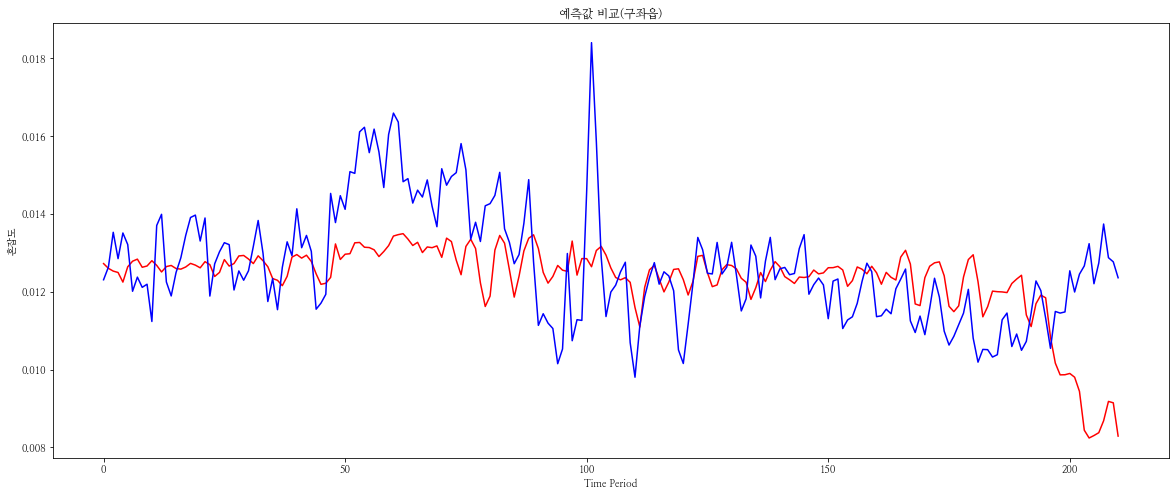

In [ ]:
# 결과 그래프 출력 '관광기후지수','평균기온','요일', 혼잡도'
plt.figure(1)
plt.plot(train_error_summary_arr[1][1],'gold')
plt.plot(test_error_summary_arr[1][1],'b')
plt.title('RMSE '+'('+test_predict_arr[1][0]+')')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Squure Error')

plt.figure(figsize=(20,8))

plt.plot(test_predict_arr[1][1],'r')
plt.plot(testY_arr[1][1],'b')

plt.title('예측값 비교'+'('+test_predict_arr[1][0]+')')
plt.xlabel('Time Period')
plt.ylabel('혼잡도')

Text(0, 0.5, '혼잡도')

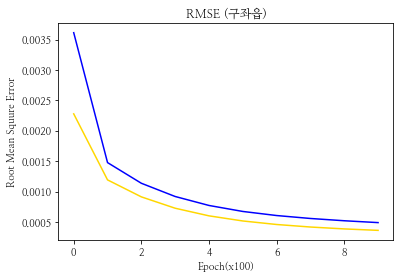

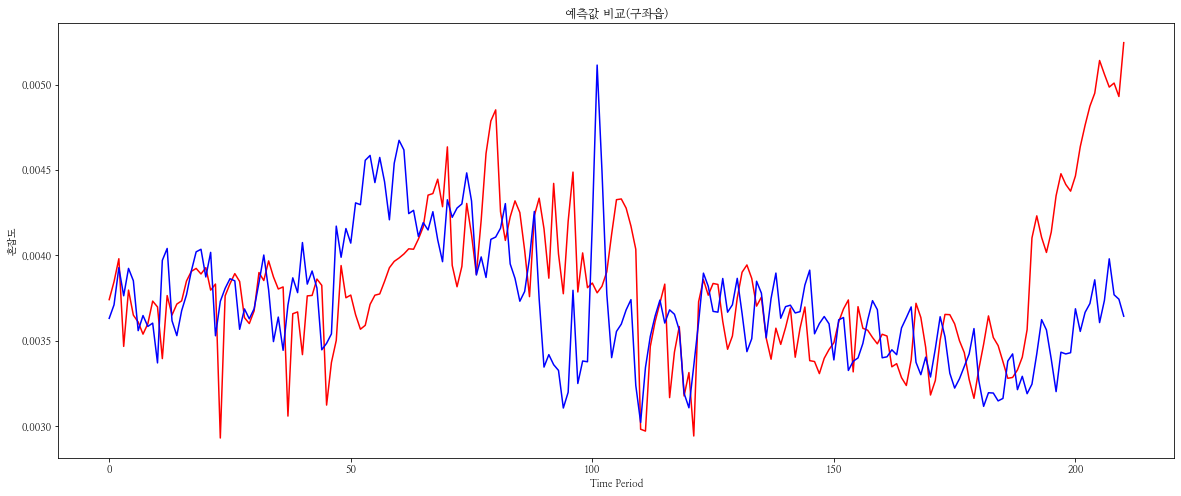

In [ ]:
# 결과 그래프 출력  '관광기후지수','평균기온','일강수량','최대풍속', '혼잡도'
plt.figure(1)
plt.plot(train_error_summary_arr[1][1],'gold')
plt.plot(test_error_summary_arr[1][1],'b')
plt.title('RMSE '+'('+test_predict_arr[1][0]+')')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Squure Error')

plt.figure(figsize=(20,8))

plt.plot(test_predict_arr[1][1],'r')
plt.plot(testY_arr[1][1],'b')

plt.title('예측값 비교'+'('+test_predict_arr[1][0]+')')
plt.xlabel('Time Period')
plt.ylabel('혼잡도')

In [ ]:
result_full_arr2

[['건입동', array([0.7832022], dtype=float32)],
 ['구좌읍', array([0.77486813], dtype=float32)],
 ['남원읍', array([-0.1243993], dtype=float32)],
 ['노형동', array([0.6276169], dtype=float32)],
 ['대정읍', array([-0.3555361], dtype=float32)],
 ['서홍동', array([-0.33210254], dtype=float32)],
 ['성산읍', array([0.41678047], dtype=float32)],
 ['안덕면', array([0.56832385], dtype=float32)],
 ['애월읍', array([0.7312536], dtype=float32)],
 ['연동', array([0.33238316], dtype=float32)],
 ['용담1동', array([0.14801359], dtype=float32)],
 ['우도면', array([0.6100937], dtype=float32)],
 ['조천읍', array([0.02045631], dtype=float32)],
 ['표선면', array([0.11554551], dtype=float32)],
 ['한경면', array([-0.09290946], dtype=float32)],
 ['한림읍', array([-0.34677148], dtype=float32)]]

Text(0, 0.5, '혼잡도')

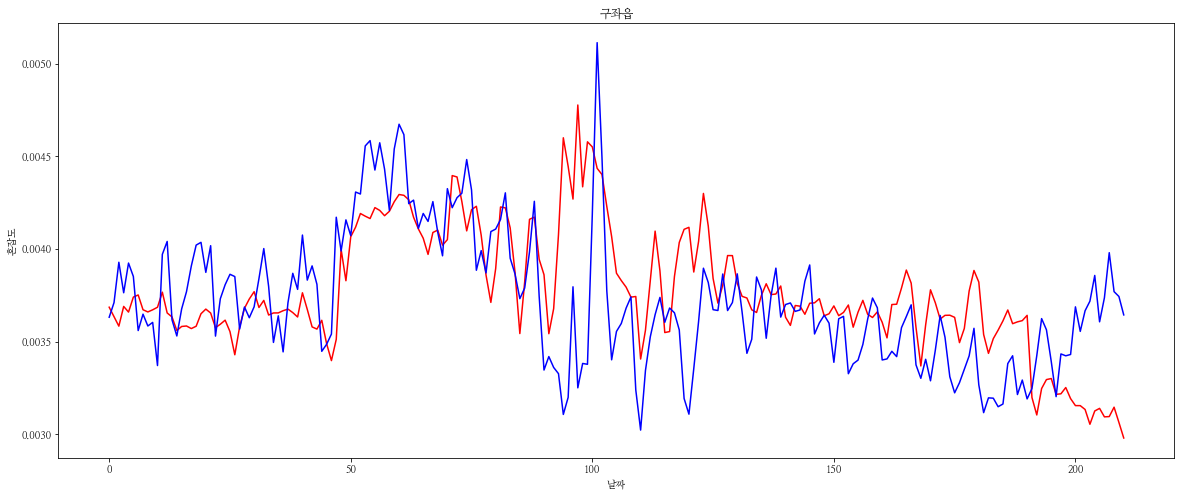

In [ ]:
# 결과 그래프 출력  '관광기후지수','평균기온','최대풍속','혼잡도'
plt.figure(1)
plt.plot(train_error_summary_arr[1][1],'gold')
plt.plot(test_error_summary_arr[1][1],'b')
plt.title('RMSE '+'('+test_predict_arr[1][0]+')')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Squure Error')

plt.figure(figsize=(20,8))

plt.plot(test_predict_arr[1][1],'r')
plt.plot(testY_arr[1][1],'b')

plt.title('예측값 비교'+'('+test_predict_arr[1][0]+')')
plt.xlabel('Time Period')
plt.ylabel('혼잡도')

In [ ]:
t_df = pd.DataFrame(result_arr, columns = ['읍면동','혼잡도'])
predict = t_df.sort_values(by="혼잡도")[:5]
print(predict)

    읍면동       혼잡도
6   성산읍 -0.422037
13  표선면 -0.362614
7   안덕면 -0.331642
1   구좌읍  0.012560
2   남원읍  0.059353


In [ ]:
a = predict['읍면동'].tolist()
p_arr = []
for i in range(len(a)):
  p_arr.append(a[i])


In [ ]:
p_arr

['성산읍', '표선면', '안덕면', '구좌읍', '남원읍']

In [ ]:
# 관광지 리스트 가져오기
tourlist = pd.read_csv("/content/drive/MyDrive/tensorflow 3조/data/targetData/jejuTourlist.csv")
tourlist = tourlist.iloc[:,1:]
tourlist = tourlist[['관광명소','분류', '분류2', '읍면동','위도','경도','월','화','수','목','금','토','일']]
tourlist

,관광명소,분류,분류2,읍면동,위도,경도,월,화,수,목,금,토,일
0,넥슨컴퓨터박물관,박물관,실내,노형동,33.471803,126.484899,휴무,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
1,이룸갤러리,미술관,실내,연동,33.494022,126.482798,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,10:00 - 21:00,14:00 - 21:00
2,오설록 티 뮤지엄,박물관,실내,안덕면,33.306090,126.289566,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
3,제주항공우주박물관,박물관,실내,안덕면,33.304541,126.299772,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00
4,아르떼뮤지엄 제주,미술관,실내,애월읍,33.397511,126.345700,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00,10:00 - 20:00
5,본태박물관,박물관,실내,안덕면,33.303924,126.392515,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00,10:00 - 18:00
6,새별오름,오름,실외,애월읍,33.366767,126.356397,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00,00:00 - 24:00
7,세계자동차&피아노 박물관,박물관,실내,안덕면,33.283410,126.349793,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30,09:00 - 17:30
8,숨도,박물관,실외,호근동,33.250635,126.536648,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00,08:00 - 18:00
9,건강과 성 박물관,박물관,실내,안덕면,33.254902,126.346939,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00,09:00 - 18:00


In [ ]:
cnt = len(p_arr) # 5개
recom_list = []

# 휴무일 2020-01-01 수
days = ['월','화','수','목','금','토','일']
day = 2
temp1 = tourlist[tourlist[days[day]]!='휴무']
for i in range(len(p_arr)):
  temp2 = temp1[temp1['읍면동']==p_arr[i]][:1]
  recom_list.append(temp2['관광명소'].tolist()[0])

recom_list

['섭지코지', '따라비오름', '오설록 티 뮤지엄', '제주해녀박물관', '큰엉해안경승지']

In [ ]:
import folium

In [ ]:
colors = ['red', 'orange', 'blue', 'green', 'pink']

In [ ]:
map = folium.Map(location = [33.371058,126.570421], zoom_start =11)

for i in range(len(recom_list)):
  temp = tourlist[tourlist['관광명소']==recom_list[i]]
  latitude =  round(temp['위도'].tolist()[0],6)
  longtitude = round(temp['경도'].tolist()[0],6)
  toursite = temp['관광명소'].tolist()[0]
  v_color = colors[i]

  folium.Marker([latitude,longtitude], popup = toursite, tooltip=toursite,icon =folium.Icon(icon = 'car', prefix='fa', color = v_color)).add_to(map)

In [ ]:
map